# Jupyter Notebook Purpose
- Load in the .csv and .csv.gz files into DataFrames and merge them
- THE REST IS UP TO YOU

In [1]:
# Group 10 Collaborators
COLLABORATORS = ["Nidhi Punja",
                 "Judith Roth",
                 "Iman Dordizadeh Basirabad",
                 "Daniel Adam Cebula",
                 "Cynthia Fung",
                 "Ben Klassen"]

# Group 10 Members
for _ in COLLABORATORS:
    print(f"Group 10 Member: {_:->30}")

Group 10 Member: -------------------Nidhi Punja
Group 10 Member: -------------------Judith Roth
Group 10 Member: -----Iman Dordizadeh Basirabad
Group 10 Member: ------------Daniel Adam Cebula
Group 10 Member: ------------------Cynthia Fung
Group 10 Member: -------------------Ben Klassen


# Table of Contents

## 1. [Python Dependencies](#1)
___
## 2. [Folder Creation](#2)
- repeated just in case
___
## 3. [Read in the Data](#3)
### a. [Preliminary Analysis](#3a)
___
## 4. [RUN THE DEPENDENCIES in #1 AND START HERE](#4)
- Steps 1 - 3 is the merging of the datasets and creating the metadata
___
## 5. [Targeted Help](#5)
- this part might help you guys or not...

# 1
# Python Dependencies

In [2]:
# Python Modules for Miscellaneous reasons
from zipfile import ZipFile  # to read and write to zipped folders
import requests  # simple HTTP library for Python
import os        # portable way to use operating system functionalities
import io        # Tool for working with streams (Input/Ouput data)
import datetime  # python classes for manipulating dates and times
import dateutil  # powerful extensions to standard datetime Python module
import time      # used for time.sleep() to delay the HTTP requests ever so slightly
import re        # used for Python regex library
import math      # radians, cos, sin, asin and sqrt are used for haversine formula
from IPython.display import display # use this to see the entire DataFrame in the right format
from create_folder import create_folder # create folder function that I have defined and placed in create_folder.py file

In [3]:
# DATA ANALYSIS / VISUALIZATION Python Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2
# Folder Creation

In [4]:
# Here are the major directory names that will hold the data / metadata
RAW_ZIPPED_DIRECTORY = create_folder(folder_name="RAW_ZIPPED")
RAW_UNZIPPED_DIRECTORY = create_folder(folder_name="RAW_UNZIPPED")
PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name="PROCESSED_ZIPPED")
PROCESSED_UNZIPPED_DIRECTORY = create_folder(folder_name="PROCESSED_UNZIPPED")

In [5]:
# Create folders for fire_incidents
FIRE_RAW_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(RAW_ZIPPED_DIRECTORY, "FIRE_INCIDENTS"))
FIRE_RAW_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(RAW_UNZIPPED_DIRECTORY, "FIRE_INCIDENTS"))
FIRE_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_INCIDENTS"))
FIRE_PROCESSED_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_UNZIPPED_DIRECTORY, "FIRE_INCIDENTS"))

In [6]:
# Create folders for toronto_weather
WEATHER_RAW_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(RAW_UNZIPPED_DIRECTORY, "TORONTO_WEATHER"))
WEATHER_PROCESSED_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_UNZIPPED_DIRECTORY, "TORONTO_WEATHER"))
WEATHER_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "TORONTO_WEATHER"))
WEATHER_PROCESSED_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_UNZIPPED_DIRECTORY, "TORONTO_WEATHER"))

In [7]:
# Create folders for fire_stations
STATIONS_RAW_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(RAW_ZIPPED_DIRECTORY, "FIRE_STATIONS"))
STATIONS_RAW_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(RAW_UNZIPPED_DIRECTORY, "FIRE_STATIONS"))
STATIONS_PROCESSED_ZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_ZIPPED_DIRECTORY, "FIRE_STATIONS"))
STATIONS_PROCESSED_UNZIPPED_DIRECTORY = create_folder(folder_name=os.path.join(PROCESSED_UNZIPPED_DIRECTORY, "FIRE_STATIONS"))

# 3
# Read in the Data

# 3a
# Preliminary Analysis
- Read in the 3 .csv.bz2 files that we will be working with

In [8]:
# fire incident data
FIRE_INCIDENT_PATH = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "2011-2018_Toronto_Fire_Incidents_PROCESSED.csv.bz2")
df_fire = pd.read_csv(FIRE_INCIDENT_PATH,
                      compression="bz2",
                      index_col="INCIDENT_NUM",
                      parse_dates=["DATETIME"])

# for faster queries I will turn the following columns to categorical data type
df_fire["CAD_TYPE"] = pd.Categorical(df_fire["CAD_TYPE"])
df_fire["CAD_CALL_TYPE"] = pd.Categorical(df_fire["CAD_CALL_TYPE"])
df_fire["FINAL_TYPE"] = pd.Categorical(df_fire["FINAL_TYPE"])
df_fire["CALL_SOURCE"] = pd.Categorical(df_fire["CALL_SOURCE"])

# Create the "DATE" column for merging - will be dropped later
df_fire["DATE"] = df_fire["DATETIME"].dt.floor("d")

df_fire.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,LATITUDE,LONGITUDE,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,DATE
INCIDENT_NUM,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,43.679099,-79.461761,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,2011-01-01
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,43.726342,-79.396401,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,2011-01-01
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,43.668548,-79.335324,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,2011-01-01
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,43.657123,-79.434313,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,2011-01-01
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,43.759840,-79.516182,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,2011-01-01


In [9]:
# fire stations locations
FIRE_STATION_LOCATIONS_PATH = os.path.join(STATIONS_PROCESSED_ZIPPED_DIRECTORY, "Toronto_Fire_Station_Locations.csv.bz2")
df_locations = pd.read_csv(FIRE_STATION_LOCATIONS_PATH,
                      compression="bz2", index_col="INDEX")

# for faster queries I will turn the following columns to categorical data type
df_locations["NAME"] = pd.Categorical(df_locations["NAME"])
df_locations["ADDRESS"] = pd.Categorical(df_locations["ADDRESS"])
df_locations["WARD_NAME"] = pd.Categorical(df_locations["WARD_NAME"])
df_locations["MUN_NAME"] = pd.Categorical(df_locations["MUN_NAME"])

df_locations.head()

,NAME,ADDRESS,LATITUDE,LONGITUDE,WARD_NAME,MUN_NAME
INDEX,,,,,,
214,FIRE STATION 214,745 MEADOWVALE RD,43.794219,-79.163605,Scarborough East (44),Scarborough
215,FIRE STATION 215,5318 LAWRENCE AVE E,43.777401,-79.148069,Scarborough East (44),Scarborough
221,FIRE STATION 221,2575 EGLINTON AVE E,43.734799,-79.255066,Scarborough Southwest (35),Scarborough
222,FIRE STATION 222,755 WARDEN AVE,43.720408,-79.284094,Scarborough Southwest (35),Scarborough
223,FIRE STATION 223,116 DORSET RD,43.723965,-79.233264,Scarborough Southwest (36),Scarborough


In [10]:
# toronto weather
TORONTO_WEATHER_PATH = os.path.join(WEATHER_PROCESSED_ZIPPED_DIRECTORY, "2010-2020_Toronto_Weather.csv.bz2")
df_weather = pd.read_csv(TORONTO_WEATHER_PATH,
                      compression="bz2", parse_dates=["DATE"],
                      index_col="DATE")
df_weather

,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
DATE,,,,,,,,
2010-01-01,1.9,-9.9,-3.00,21.00,0.0,0.0,0.63,0.0
2010-01-02,-9.7,-18.5,-14.05,32.05,0.0,0.0,0.33,1.0
2010-01-03,-9.3,-17.0,-12.90,30.90,0.0,0.0,1.90,1.0
2010-01-04,-6.7,-13.5,-9.85,27.85,0.0,0.0,0.27,3.5
2010-01-05,-3.6,-12.5,-7.65,25.65,0.0,0.0,1.30,4.5
...,...,...,...,...,...,...,...,...
2020-12-27,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0
2020-12-28,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0
2020-12-29,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.0


In [11]:
# Merge the fire incidents and toronto weather dataframes together
df_merge = df_fire.merge(df_weather,
                         how="inner",
                         right_index=True,
                         left_on="DATE",
                         suffixes=("", "_WEATHER"))

# drop the "DATE" column as it is no longer needed
df_merge = df_merge.drop(columns=["DATE"])

df_merge.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,LATITUDE,LONGITUDE,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,...,CALL_SOURCE,PERSONS_RESCUED,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,43.679099,-79.461761,Medical,Medical,89 - Other Medical,...,03 - From Ambulance,0.0,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,43.726342,-79.396401,Medical,Carbon Monoxide,89 - Other Medical,...,01 - 911,0.0,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,43.668548,-79.335324,Medical,Medical,89 - Other Medical,...,03 - From Ambulance,0.0,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,43.657123,-79.434313,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,01 - 911,0.0,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,43.759840,-79.516182,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",...,05 - Telephone from Monitoring Agency,0.0,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


In [12]:
# Merge the above dataframe with Fire Station Locations
df_merge = df_merge.merge(df_locations,
                          how="left",
                          right_index=True,
                          left_on="FIRE_STATION",
                          suffixes=("", "_STATION"))
df_merge.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,LATITUDE,LONGITUDE,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,...,CDD,RAIN_MM,PRECIP_MM,SNOW_CM,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,43.679099,-79.461761,Medical,Medical,89 - Other Medical,...,0.0,3.7,8.7,0.0,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,43.726342,-79.396401,Medical,Carbon Monoxide,89 - Other Medical,...,0.0,3.7,8.7,0.0,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,43.668548,-79.335324,Medical,Medical,89 - Other Medical,...,0.0,3.7,8.7,0.0,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,43.657123,-79.434313,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",...,0.0,3.7,8.7,0.0,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,43.759840,-79.516182,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",...,0.0,3.7,8.7,0.0,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York


In [13]:
# Reorder the Columns in a more favourable order
df_merge = df_merge.loc[:, ['DATETIME', 'MINUTES_ARRIVAL',
                            'MINUTES_LEAVE', 'FIRE_STATION',
                            'FIRE_STATION_CLOSEST', 'NAME',
                            'ADDRESS', 'LATITUDE_STATION',
                            'LONGITUDE_STATION', 'WARD_NAME',
                            'MUN_NAME', 'CAD_TYPE',
                            'CAD_CALL_TYPE', 'FINAL_TYPE',
                            'ALARM_LEVEL', 'CALL_SOURCE',
                            'PERSONS_RESCUED', 'LATITUDE',
                            'LONGITUDE', 'MAX_TEMP',
                            'MIN_TEMP', 'MEAN_TEMP',
                            'HDD', 'CDD', 'RAIN_MM',
                            'PRECIP_MM', 'SNOW_CM']]
df_merge.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),...,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),...,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),...,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),...,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),...,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


In [14]:
# get some info from the DataFrame
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975113 entries, F11000010 to F18139242
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DATETIME              975113 non-null  datetime64[ns]
 1   MINUTES_ARRIVAL       951654 non-null  float64       
 2   MINUTES_LEAVE         951650 non-null  float64       
 3   FIRE_STATION          975113 non-null  int64         
 4   FIRE_STATION_CLOSEST  975113 non-null  int64         
 5   NAME                  975113 non-null  category      
 6   ADDRESS               975113 non-null  category      
 7   LATITUDE_STATION      975113 non-null  float64       
 8   LONGITUDE_STATION     975113 non-null  float64       
 9   WARD_NAME             975113 non-null  category      
 10  MUN_NAME              975113 non-null  category      
 11  CAD_TYPE              975113 non-null  category      
 12  CAD_CALL_TYPE         975113 non-null  category     

In [15]:
# write this merged DataFrame to a csv.bz2 file
PATH_MERGED_CSV_BZ2 = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET.csv.bz2")
df_merge.to_csv(PATH_MERGED_CSV_BZ2, compression='bz2')

In [16]:
# here is the metadata for the columns
metadata_dict = {
    "INCIDENT_NUM" : "Toronto Fire Services (TFS) incident number.  Used as index for the DataFrame because it is unique for each call.",
    "DATETIME" : "Year, Month, Day, Hour, Minute, Second of when TFS was notified of the incident (alarm).",
    "MINUTES_ARRIVAL" : "Minutes it took for the first unit to arrive (after alarm).",
    "MINUTES_LEAVE" : "Minutes it took for the first unit to leave (after arrival).",
    "FIRE_STATION" : "Number of TFS Station where incident occurred.",
    "FIRE_STATION_CLOSEST" : "Number of closest (by Haversine formula in 02-Geopandas_and_Merging.ipynb) TFS Station where incident occurred.",
    "NAME" : "Name of column FIRE_STATION TFS Fire Station.",
    "ADDRESS" : "Address of column FIRE_STATION TFS Fire Station.",
    "LATITUDE_STATION" : "Latitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.",
    "LONGITUDE_STATION" : "Longitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.",
    "WARD_NAME" : "Municipality Ward Name of column FIRE_STATION TFS Fire Station.",
    "MUN_NAME" : "Name of Toronto / GTA Municipality of column FIRE_STATION TFS Fire Station.",
    "CAD_TYPE" : "First event type in CAD system of this incident.",
    "CAD_CALL_TYPE" : "First call type in CAD system of this incident. Call type is a group of event types.",
    "FINAL_TYPE" : "Final incident type.",
    "ALARM_LEVEL" : "Alarm level of the event.",
    "CALL_SOURCE" : "Source of the call to TFS.",
    "PERSONS_RESCUED" : "Number of persons rescued, if any.",
    "LATITUDE" : "Latitude (Decimal Degrees) of nearest major / minor intersection of incident.",
    "LONGITUDE" : "Longitude (Decimal Degrees) of nearest major / minor intersection of incident.",
    "MAX_TEMP" : "Maximum Temperature (Celsius) recorded across 3 Toronto Weather Stations for a given day.",
    "MIN_TEMP" : "Minimum Temperature (Celsius) recorded across 3 Toronto Weather Stations for a given day.",
    "MEAN_TEMP" : "Average Temperature (Celsius) recorded across 3 Toronto Weather Stations for a given day.",
    "HDD" : "Heating Degree Day (HDD, Celsius) recorded across 3 Toronto Weather Stations for a given day.",
    "CDD" : "Cooling Degree Day (CDD, Celsius) recorded across 3 Toronto Weather Stations for a given day.",
    "RAIN_MM" : "Measured Rain (mm / day) recorded across 3 Toronto Weather Stations for a given day.",
    "PRECIP_MM" : "Measured Precipiation (mm / day) recorded across 3 Toronto Weather Stations for a given day.",
    "SNOW_CM" : "Snow on Ground (cm) recorded across 3 Toronto Weather Stations for a given day."
}

# create a metadata DataFrame
df_metadata = pd.DataFrame(metadata_dict.items(),
                           columns=["COLUMN_NAME", "COLUMN_DESCRIPTION"]
                          ).set_index("COLUMN_NAME")

# display it
with pd.option_context('display.max_colwidth', 300):
    display(df_metadata)

,COLUMN_DESCRIPTION
COLUMN_NAME,
INCIDENT_NUM,Toronto Fire Services (TFS) incident number. Used as index for the DataFrame because it is unique for each call.
DATETIME,"Year, Month, Day, Hour, Minute, Second of when TFS was notified of the incident (alarm)."
MINUTES_ARRIVAL,Minutes it took for the first unit to arrive (after alarm).
MINUTES_LEAVE,Minutes it took for the first unit to leave (after arrival).
FIRE_STATION,Number of TFS Station where incident occurred.
FIRE_STATION_CLOSEST,Number of closest (by Haversine formula in 02-Geopandas_and_Merging.ipynb) TFS Station where incident occurred.
NAME,Name of column FIRE_STATION TFS Fire Station.
ADDRESS,Address of column FIRE_STATION TFS Fire Station.
LATITUDE_STATION,Latitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.


In [17]:
# write this metadata to the folders to explain what this data represents
# just for you guys later on
df_metadata.to_csv(
    os.path.join(FIRE_PROCESSED_UNZIPPED_DIRECTORY, "FINAL_DATASET_METADATA.csv")
)
df_metadata.to_csv(
    os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET_METADATA.csv")
)

# 4
# YOUR WORK GOES HERE

In [18]:
# go nuts \_(O^-^O)_/
import __hello__

Hello world!


In [19]:
# read in the metadata from .csv into memory
# use this metatdata to explain the columns below
df_metadata = pd.read_csv(
    os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET_METADATA.csv"),
    index_col="COLUMN_NAME")

# display it
with pd.option_context('display.max_colwidth', 300):
    display(df_metadata)

,COLUMN_DESCRIPTION
COLUMN_NAME,
INCIDENT_NUM,Toronto Fire Services (TFS) incident number. Used as index for the DataFrame because it is unique for each call.
DATETIME,"Year, Month, Day, Hour, Minute, Second of when TFS was notified of the incident (alarm)."
MINUTES_ARRIVAL,Minutes it took for the first unit to arrive (after alarm).
MINUTES_LEAVE,Minutes it took for the first unit to leave (after arrival).
FIRE_STATION,Number of TFS Station where incident occurred.
FIRE_STATION_CLOSEST,Number of closest (by Haversine formula in 02-Geopandas_and_Merging.ipynb) TFS Station where incident occurred.
NAME,Name of column FIRE_STATION TFS Fire Station.
ADDRESS,Address of column FIRE_STATION TFS Fire Station.
LATITUDE_STATION,Latitude (Decimal Degrees) of column FIRE_STATION TFS Fire Station.


In [20]:
# read the merged DataFrame from .csv.bz2 file into DataFrame
PATH_MERGED_CSV_BZ2 = os.path.join(FIRE_PROCESSED_ZIPPED_DIRECTORY, "FINAL_DATASET.csv.bz2")
df_total = pd.read_csv(PATH_MERGED_CSV_BZ2,
                       compression='bz2', index_col="INCIDENT_NUM", parse_dates=["DATETIME"])

# make the columns categorical (for faster queries)
df_total["CAD_TYPE"] = pd.Categorical(df_total["CAD_TYPE"])
df_total["CAD_CALL_TYPE"] = pd.Categorical(df_total["CAD_CALL_TYPE"])
df_total["FINAL_TYPE"] = pd.Categorical(df_total["FINAL_TYPE"])
df_total["CALL_SOURCE"] = pd.Categorical(df_total["CALL_SOURCE"])
df_total["NAME"] = pd.Categorical(df_total["NAME"])
df_total["ADDRESS"] = pd.Categorical(df_total["ADDRESS"])
df_total["WARD_NAME"] = pd.Categorical(df_total["WARD_NAME"])
df_total["MUN_NAME"] = pd.Categorical(df_total["MUN_NAME"])

df_total.head()

# display it
with pd.option_context('display.max_columns', None):
    display(df_total.head())

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,MUN_NAME,CAD_TYPE,CAD_CALL_TYPE,FINAL_TYPE,ALARM_LEVEL,CALL_SOURCE,PERSONS_RESCUED,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.679099,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),former Toronto,Medical,Carbon Monoxide,89 - Other Medical,1,01 - 911,0.0,43.726342,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),former Toronto,Medical,Medical,89 - Other Medical,1,03 - From Ambulance,0.0,43.668548,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),former Toronto,FIG - Fire - Grass/Rubbish,Emergency Fire,"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vand...",1,01 - 911,0.0,43.657123,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),North York,FAHR - Alarm Highrise Residential,Emergency Fire,"33 - Human - Malicious intent, prank",1,05 - Telephone from Monitoring Agency,0.0,43.759840,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0


In [21]:
# percentage of nulls in each column
# only around ~2.5% of nulls or less
(df_total.isnull().sum() / len(df_total)) * 100

DATETIME                0.000000
MINUTES_ARRIVAL         2.405772
MINUTES_LEAVE           2.406183
FIRE_STATION            0.000000
FIRE_STATION_CLOSEST    0.000000
NAME                    0.000000
ADDRESS                 0.000000
LATITUDE_STATION        0.000000
LONGITUDE_STATION       0.000000
WARD_NAME               0.000000
MUN_NAME                0.000000
CAD_TYPE                0.000000
CAD_CALL_TYPE           0.000000
FINAL_TYPE              0.004923
ALARM_LEVEL             0.000000
CALL_SOURCE             0.007179
PERSONS_RESCUED         0.006974
LATITUDE                0.000000
LONGITUDE               0.000000
MAX_TEMP                0.000000
MIN_TEMP                0.000000
MEAN_TEMP               0.000000
HDD                     0.000000
CDD                     0.000000
RAIN_MM                 0.000000
PRECIP_MM               0.000000
SNOW_CM                 0.000000
dtype: float64

In [22]:
# get information about the completed DataSet
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975113 entries, F11000010 to F18139242
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DATETIME              975113 non-null  datetime64[ns]
 1   MINUTES_ARRIVAL       951654 non-null  float64       
 2   MINUTES_LEAVE         951650 non-null  float64       
 3   FIRE_STATION          975113 non-null  int64         
 4   FIRE_STATION_CLOSEST  975113 non-null  int64         
 5   NAME                  975113 non-null  category      
 6   ADDRESS               975113 non-null  category      
 7   LATITUDE_STATION      975113 non-null  float64       
 8   LONGITUDE_STATION     975113 non-null  float64       
 9   WARD_NAME             975113 non-null  category      
 10  MUN_NAME              975113 non-null  category      
 11  CAD_TYPE              975113 non-null  category      
 12  CAD_CALL_TYPE         975113 non-null  category     

# 5
# Targeted Help

## FOR JUDITH

In [23]:
# HOW TO ACCESS DIFFERENT TIMES (for Judith)

# this is the datetime column
# as you can see it is in datetime64[ns] datatype (nanosecond resolution)
df_total["DATETIME"]

INCIDENT_NUM
F11000010   2011-01-01 00:03:43
F11000011   2011-01-01 00:03:55
F11000012   2011-01-01 00:05:03
F11000013   2011-01-01 00:04:46
F11000014   2011-01-01 00:06:07
                    ...        
F18139238   2018-12-31 23:55:07
F18139239   2018-12-31 23:56:38
F18139240   2018-12-31 23:56:52
F18139241   2018-12-31 23:59:30
F18139242   2018-12-31 23:59:41
Name: DATETIME, Length: 975113, dtype: datetime64[ns]

In [24]:
# to access different time aspects use the .dt accessor (DatetimeProperties accessor)
df_total["DATETIME"].dt

In [25]:
# how you get Panda Series of Hours for example as integers
df_total["DATETIME"].dt.hour

INCIDENT_NUM
F11000010     0
F11000011     0
F11000012     0
F11000013     0
F11000014     0
             ..
F18139238    23
F18139239    23
F18139240    23
F18139241    23
F18139242    23
Name: DATETIME, Length: 975113, dtype: int64

In [26]:
# to round to the nearest hour (might be interested) use the following
df_total["DATETIME"].dt.round("H").dt.hour

INCIDENT_NUM
F11000010    0
F11000011    0
F11000012    0
F11000013    0
F11000014    0
            ..
F18139238    0
F18139239    0
F18139240    0
F18139241    0
F18139242    0
Name: DATETIME, Length: 975113, dtype: int64

In [27]:
# to slice the dataframe for certain hours do the following with .loc[]
# as you can see it returns all hours rounded to 5
df_total.loc[df_total["DATETIME"].dt.round("H").dt.hour == 5, :]

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000211,2011-01-01 04:30:14,6.933,16.833,242,242,FIRE STATION 242,2733 BRIMLEY RD,43.806920,-79.277256,Scarborough-Rouge River (41),...,43.809888,-79.257699,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000212,2011-01-01 04:33:43,4.983,13.167,325,325,FIRE STATION 325,475 DUNDAS ST E,43.659379,-79.364857,Toronto Centre-Rosedale (28),...,43.656163,-79.370123,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000213,2011-01-01 04:33:33,9.017,13.400,441,441,FIRE STATION 441,947 MARTIN GROVE RD,43.694969,-79.571923,Etobicoke North (2),...,43.680895,-79.566068,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000214,2011-01-01 04:44:42,4.617,8.583,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),...,43.664593,-79.429334,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000215,2011-01-01 04:49:31,7.717,11.400,116,116,FIRE STATION 116,255 ESTHER SHINER BLVD,43.769155,-79.365067,Willowdale (24),...,43.773343,-79.359498,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F18138918,2018-12-31 04:37:37,5.333,9.850,314,215,FIRE STATION 314,12 GROSVENOR ST,43.663066,-79.384665,Toronto Centre-Rosedale (27),...,0.000000,0.000000,6.3,-5.5,1.33,16.67,0.0,6.4,13.5,1.5
F18138919,2018-12-31 05:08:08,NaN,NaN,142,215,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),...,0.000000,0.000000,6.3,-5.5,1.33,16.67,0.0,6.4,13.5,1.5
F18138920,2018-12-31 05:09:31,4.333,32.550,132,215,FIRE STATION 132,476 LAWRENCE AVE W,43.719807,-79.428575,Eglinton-Lawrence (16),...,0.000000,0.000000,6.3,-5.5,1.33,16.67,0.0,6.4,13.5,1.5


In [28]:
# to slice the dataframe for certain hours do the following with .loc[]
# as you can see it returns all hours between roudned 10 PM and rounded 5 AM
df_total.loc[
    ((df_total["DATETIME"].dt.round("H").dt.hour >= 22) |
     (df_total["DATETIME"].dt.round("H").dt.hour <= 5)), :]

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,LATITUDE,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),...,43.679099,-79.461761,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),...,43.726342,-79.396401,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),...,43.668548,-79.335324,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),...,43.657123,-79.434313,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),...,43.759840,-79.516182,11.5,0.9,6.40,11.60,0.0,3.7,8.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F18139238,2018-12-31 23:55:07,4.433,6.817,312,344,FIRE STATION 312,34 YORKVILLE AVE,43.671883,-79.388924,Toronto Centre-Rosedale (27),...,43.667162,-79.401539,6.3,-5.5,1.33,16.67,0.0,6.4,13.5,1.5
F18139239,2018-12-31 23:56:38,5.650,2.667,442,215,FIRE STATION 442,2015 LAWRENCE AVE W,43.700599,-79.512384,York South-Weston (11),...,0.000000,0.000000,6.3,-5.5,1.33,16.67,0.0,6.4,13.5,1.5
F18139240,2018-12-31 23:56:52,6.667,4.183,322,215,FIRE STATION 322,256 COSBURN AVE,43.690995,-79.342347,Toronto-Danforth (29),...,0.000000,0.000000,6.3,-5.5,1.33,16.67,0.0,6.4,13.5,1.5


In [29]:
# lets say you want a subset of the columns above then just do as follows
df_total.loc[
    ((df_total["DATETIME"].dt.round("H").dt.hour >= 22) |
     (df_total["DATETIME"].dt.round("H").dt.hour <= 5)), ["FIRE_STATION", "FIRE_STATION_CLOSEST"]]

,FIRE_STATION,FIRE_STATION_CLOSEST
INCIDENT_NUM,,
F11000010,342,342
F11000011,131,131
F11000012,324,324
F11000013,345,345
F11000014,142,142
...,...,...
F18139238,312,344
F18139239,442,215
F18139240,322,215


In [30]:
# you can also access, year, month, day, minute, second if you wish
# you can also get the day of the week if you want (0 is sunday, 7 is saturday)
df_total["DATETIME"].dt.year
df_total["DATETIME"].dt.month
df_total["DATETIME"].dt.day
df_total["DATETIME"].dt.minute
df_total["DATETIME"].dt.second
df_total["DATETIME"].dt.dayofweek

INCIDENT_NUM
F11000010    5
F11000011    5
F11000012    5
F11000013    5
F11000014    5
            ..
F18139238    0
F18139239    0
F18139240    0
F18139241    0
F18139242    0
Name: DATETIME, Length: 975113, dtype: int64

In [31]:
# to get the maximum datetime
df_total["DATETIME"].max()

Timestamp('2018-12-31 23:59:41')

In [32]:
# and the minimum datetime
df_total["DATETIME"].min()

Timestamp('2011-01-01 00:03:43')

In [33]:
df_total["DATETIME"]

INCIDENT_NUM
F11000010   2011-01-01 00:03:43
F11000011   2011-01-01 00:03:55
F11000012   2011-01-01 00:05:03
F11000013   2011-01-01 00:04:46
F11000014   2011-01-01 00:06:07
                    ...        
F18139238   2018-12-31 23:55:07
F18139239   2018-12-31 23:56:38
F18139240   2018-12-31 23:56:52
F18139241   2018-12-31 23:59:30
F18139242   2018-12-31 23:59:41
Name: DATETIME, Length: 975113, dtype: datetime64[ns]

In [34]:
df_total.columns

Index(['DATETIME', 'MINUTES_ARRIVAL', 'MINUTES_LEAVE', 'FIRE_STATION',
       'FIRE_STATION_CLOSEST', 'NAME', 'ADDRESS', 'LATITUDE_STATION',
       'LONGITUDE_STATION', 'WARD_NAME', 'MUN_NAME', 'CAD_TYPE',
       'CAD_CALL_TYPE', 'FINAL_TYPE', 'ALARM_LEVEL', 'CALL_SOURCE',
       'PERSONS_RESCUED', 'LATITUDE', 'LONGITUDE', 'MAX_TEMP', 'MIN_TEMP',
       'MEAN_TEMP', 'HDD', 'CDD', 'RAIN_MM', 'PRECIP_MM', 'SNOW_CM'],
      dtype='object')

In [35]:
# you can also resample the dataframe
# you will need to change the index into a DateTimeIndex
# then you will need to set an aggregation value like first(), last(), mean(), count()
df_datetime = pd.DataFrame(data={"DATETIME":df_total["DATETIME"].values,
                                 "MINUTES_ARRIVAL":df_total["MINUTES_ARRIVAL"].values})

# turn DATETIME back into datetime
df_datetime["DATETIME"] = pd.to_datetime(df_datetime["DATETIME"])

# set the "DATETIME" column to index
df_datetime.index = df_datetime["DATETIME"]

# drop the column
df_datetime = df_datetime.drop(columns=["DATETIME"])

df_datetime

,MINUTES_ARRIVAL
DATETIME,
2011-01-01 00:03:43,6.317
2011-01-01 00:03:55,5.117
2011-01-01 00:05:03,4.517
2011-01-01 00:04:46,6.000
2011-01-01 00:06:07,4.933
...,...
2018-12-31 23:55:07,4.433
2018-12-31 23:56:38,5.650
2018-12-31 23:56:52,6.667


In [36]:
# resample monthly (need to specify aggregation)
df_datetime.resample("m")

In [37]:
# get the last value for all columns ofr example
df_datetime.resample("m").last()

,MINUTES_ARRIVAL
DATETIME,
2011-01-31,5.067
2011-02-28,6.950
2011-03-31,4.383
2011-04-30,4.267
2011-05-31,3.367
...,...
2018-08-31,6.733
2018-09-30,3.750
2018-10-31,8.133


## FOR BEN

In [38]:
# To create bins for temperature ranges you will first need to figure
# out the minimum and the maximum temperatures for the 7 year range in the dataset
maximum_temp = df_total["MAX_TEMP"].max()
minimum_temp = df_total["MAX_TEMP"].min()

maximum_temp, minimum_temp

(38.2, -18.5)

In [39]:
# take the ceiling and the floor of the above 2 values
max_ceil = math.ceil(maximum_temp/10)*10
min_floor = math.floor(minimum_temp/10)*10

max_ceil, min_floor

(40, -20)

In [40]:
# create a list of the range (I chose step to be 10)
step=10
temp_range = list(np.arange(min_floor, max_ceil+1, step))
temp_range

[-20, -10, 0, 10, 20, 30, 40]

In [41]:
# create a list of labels
labels = [f"{value} to {temp_range[index+1]}" for (index, value) in enumerate(temp_range[:-1])]
labels

['-20 to -10', '-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 40']

In [42]:
# lets bin the temperatures (I chose the means)
# I created a Column in the DataFrame to hold the bin labels after binning
df_total["MEAN_TEMP_BINS"] = pd.cut(df_total["MEAN_TEMP"],
                                    bins=temp_range,
                                    labels=labels)

df_total.head()

,DATETIME,MINUTES_ARRIVAL,MINUTES_LEAVE,FIRE_STATION,FIRE_STATION_CLOSEST,NAME,ADDRESS,LATITUDE_STATION,LONGITUDE_STATION,WARD_NAME,...,LONGITUDE,MAX_TEMP,MIN_TEMP,MEAN_TEMP,HDD,CDD,RAIN_MM,PRECIP_MM,SNOW_CM,MEAN_TEMP_BINS
INCIDENT_NUM,,,,,,,,,,,,,,,,,,,,,
F11000010,2011-01-01 00:03:43,6.317,21.267,342,342,FIRE STATION 342,106 ASCOT AVE,43.679375,-79.448630,Davenport (17),...,-79.461761,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 10
F11000011,2011-01-01 00:03:55,5.117,6.183,131,131,FIRE STATION 131,3135 YONGE ST,43.726226,-79.402161,Don Valley West (25),...,-79.396401,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 10
F11000012,2011-01-01 00:05:03,4.517,17.617,324,324,FIRE STATION 324,840 GERRARD ST E,43.667767,-79.343518,Toronto-Danforth (30),...,-79.335324,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 10
F11000013,2011-01-01 00:04:46,6.000,9.883,345,345,FIRE STATION 345,1287 DUFFERIN ST,43.667401,-79.438153,Davenport (18),...,-79.434313,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 10
F11000014,2011-01-01 00:06:07,4.933,10.133,142,142,FIRE STATION 142,2753 JANE ST,43.745991,-79.514374,York Centre (9),...,-79.516182,11.5,0.9,6.4,11.6,0.0,3.7,8.7,0.0,0 to 10


In [43]:
# after binning we can groupby on it
# the [[]] is used to ensure the groupby result will be returned as a DataFrame
# a random column is chosen because I wanted to get the count
df_total[["MEAN_TEMP_BINS", "MEAN_TEMP"]].groupby("MEAN_TEMP_BINS").count().rename(columns={"MEAN_TEMP": "COUNT"})

,COUNT
MEAN_TEMP_BINS,
-20 to -10,32840
-10 to 0,166524
0 to 10,293373
10 to 20,277761
20 to 30,202740
30 to 40,829


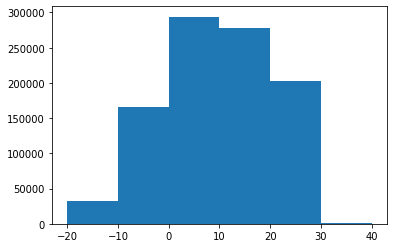

In [44]:
# Hopefully this helps
# have a histogram on me
plt.hist("MEAN_TEMP", temp_range, data=df_total);

## FOR CYNTHIA

In [45]:
# for the different call sources I took the liberty of converting
# the column into Categorical (faster computing)
df_total["CALL_SOURCE"]

INCIDENT_NUM
F11000010                      03 - From Ambulance
F11000011                                 01 - 911
F11000012                      03 - From Ambulance
F11000013                                 01 - 911
F11000014    05 - Telephone from Monitoring Agency
                             ...                  
F18139238    05 - Telephone from Monitoring Agency
F18139239                      03 - From Ambulance
F18139240                      03 - From Ambulance
F18139241                      03 - From Ambulance
F18139242                      03 - From Ambulance
Name: CALL_SOURCE, Length: 975113, dtype: category
Categories (11, object): [01 - 911, 02 - Telephone from Civlian (other than 911), 03 - From Ambulance, 04 - From Police Services, ..., 08 - Two-Way Radio (Fire Department), 09 - Other Alarm, 10 - No Alarm Received - No Response, 11 - No alarm received - incident discovered b...]

In [46]:
# you can use the .cat accessor (CategoricalAccessor object)
# to access the codes and categories (which allow it to be computed faster)
df_total["CALL_SOURCE"].cat

In [47]:
# to access the categories
df_total["CALL_SOURCE"].cat.categories

Index(['01 - 911', '02 - Telephone from Civlian (other than 911)',
       '03 - From Ambulance', '04 - From Police Services',
       '05 - Telephone from Monitoring Agency', '06 - Direct Connection',
       '07 - Verbal Report to Station (in person)',
       '08 - Two-Way Radio (Fire Department)', '09 - Other Alarm',
       '10 - No Alarm Received - No Response',
       '11 - No alarm received - incident discovered by FD'],
      dtype='object')

In [48]:
# to access the codes
# this is what the column saves in memory
df_total["CALL_SOURCE"].cat.codes

INCIDENT_NUM
F11000010    2
F11000011    0
F11000012    2
F11000013    0
F11000014    4
            ..
F18139238    4
F18139239    2
F18139240    2
F18139241    2
F18139242    2
Length: 975113, dtype: int8

In [49]:
# don't worry the column will still behave normally (you will just see a performance boost)
for _ in df_total["CALL_SOURCE"].unique():
    print(_)

03 - From Ambulance
01 - 911
05 - Telephone from Monitoring Agency
04 - From Police Services
08 - Two-Way Radio (Fire Department)
11 - No alarm received - incident discovered by FD
02 - Telephone from Civlian (other than 911)
09 - Other Alarm
07 - Verbal Report to Station (in person)
06 - Direct Connection
10 - No Alarm Received - No Response
nan


In [50]:
# groupby is much faster too
df_total[["CALL_SOURCE", "FINAL_TYPE"]].groupby("CALL_SOURCE").count().rename(columns={"FINAL_TYPE": "COUNT"})

,COUNT
CALL_SOURCE,
01 - 911,200111
02 - Telephone from Civlian (other than 911),22152
03 - From Ambulance,540335
04 - From Police Services,26610
05 - Telephone from Monitoring Agency,170926
06 - Direct Connection,1376
07 - Verbal Report to Station (in person),5268
08 - Two-Way Radio (Fire Department),4824
09 - Other Alarm,2758


## FOR THOSE WORKING ON "CAD_TYPE", "CAD_CALL_TYPE", "FINAL_TYPE"

In [51]:
# CAD_TYPE
with pd.option_context('display.max_rows', None):
    display(df_total[["CAD_TYPE", "FINAL_TYPE"]].groupby("CAD_TYPE").count().rename(columns={"FINAL_TYPE": "COUNT"}))

,COUNT
CAD_TYPE,
CBRN1 - CBRN Level 1,551
CBRN2 - CBRN Level 2,56
CC - Check Call,14757
CCA - Check Call Assist,1520
CCNE - Check Call - Non Emergency,2068
CLAN - Clandestine Lab,56
CONM - Carbon Monoxide - Non Medical,2858
CONMNE - Carbon Monoxide - Non Medical - Non Emergency,20
FACC - Fire Alarm - Check Call,10044


In [52]:
# CAD_CALL_TYPE
with pd.option_context('display.max_rows', None):
    display(df_total[["CAD_CALL_TYPE", "FINAL_TYPE"]].groupby("CAD_CALL_TYPE").count().rename(columns={"FINAL_TYPE": "COUNT"}))

,COUNT
CAD_CALL_TYPE,
CBRN & Hazardous Materials,10937
Carbon Monoxide,28266
Emergency Fire,272645
Medical,513335
Non Emergency,4686
Other Emergency Events,64954
Technical Rescue,26376
Vehicle Incident,53866


In [53]:
df_total.columns

Index(['DATETIME', 'MINUTES_ARRIVAL', 'MINUTES_LEAVE', 'FIRE_STATION',
       'FIRE_STATION_CLOSEST', 'NAME', 'ADDRESS', 'LATITUDE_STATION',
       'LONGITUDE_STATION', 'WARD_NAME', 'MUN_NAME', 'CAD_TYPE',
       'CAD_CALL_TYPE', 'FINAL_TYPE', 'ALARM_LEVEL', 'CALL_SOURCE',
       'PERSONS_RESCUED', 'LATITUDE', 'LONGITUDE', 'MAX_TEMP', 'MIN_TEMP',
       'MEAN_TEMP', 'HDD', 'CDD', 'RAIN_MM', 'PRECIP_MM', 'SNOW_CM',
       'MEAN_TEMP_BINS'],
      dtype='object')

In [54]:
# FINAL_TYPE
with pd.option_context('display.max_rows', None):
    display(df_total[["FINAL_TYPE", "ALARM_LEVEL"]].groupby("FINAL_TYPE").count().rename(columns={"ALARM_LEVEL": "COUNT"}))

,COUNT
FINAL_TYPE,
01 - Fire,16206
"02 - Explosion (including during Fire, excluding Codes 3 & 11-13)",107
"03 - NO LOSS OUTDOOR fire (exc: Sus.arson,vandal,child playing,recycling or dump fires)",11164
"11 - Overpressure Rupture (No Fire, eg steam boilers, hot water)",1363
"12 - Munition Explosion - (no fire, e.g. bombs, dynamites)",24
13 - Overpressure Rupture - gas pipe (no fire),243
"21 - Overheat (no fire, e.g. engines, mechanical devices)",10326
22 - Pot on Stove (no fire),19903
23 - Open air burning/unauthorized controlled burning (no uncontrolled fire),7878
